<a href="https://colab.research.google.com/github/akshaya-ravi19/ENews-Express---Business-Statistics/blob/main/ENews_Express_Learner_Notebook_Full_Code_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
#To view the first five rows of the Dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
#To view the last five rows of the Dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
#To check the shape of the Dataset
df.shape
print('There are',df.shape[0],'rows and',df.shape[1],'columns in the Dataset.')

There are 100 rows and 6 columns in the Dataset.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 4 object type variables and 2 numerical (1 float and 1 interger) data type varibales in the Dataset.

In [ ]:
#To infer satistical summary for all the variables from the Dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. group: exactly half of the users belong to the first group (control) and the other half belong to the second group (treatment)
landing_page: exactly half of the landing pages are new and the other half are old.
2. time_spent_on_the_page: Average time spent on the pages by the users are 5.3778 minutes with the maximum time spent on the pages are 10.71 minutes. The standard deviation is 2.37 minutes
converted: There are 54 users, out of 100, that got converted to a subscriber of the news portal
3. language_preferred:There are 3 languages (Spanish, French and English) in total chosen by the user to view the landing pages with the most preferred language being Spanish and French.


In [ ]:
#To check for missing values in the Dataset
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the given Dataset.

In [ ]:
#To check for duplicate values in the Dataset
df.duplicated().sum()

0

There are no duplicated values in the given Dataset.

### Univariate Analysis

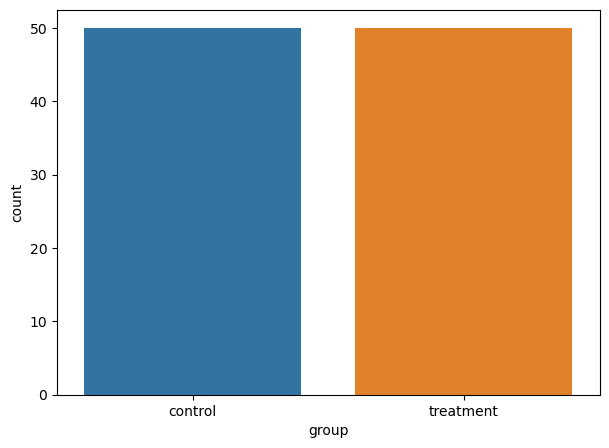

In [ ]:
#1 Group
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='group')
plt.show()

It can be observed from the graph above that equal number [50 out of 100] of users belong to each group [control and treatment].

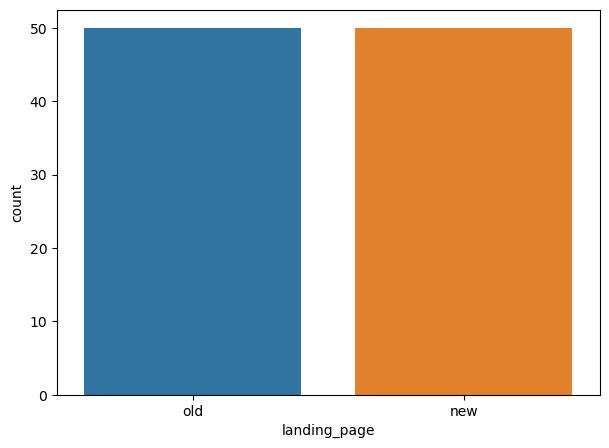

In [ ]:
#2 Landing Page
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='landing_page')
plt.show()

It can be observed from the graph above that exactly half, 50 out of 100, landing pages are new and the other half is old.

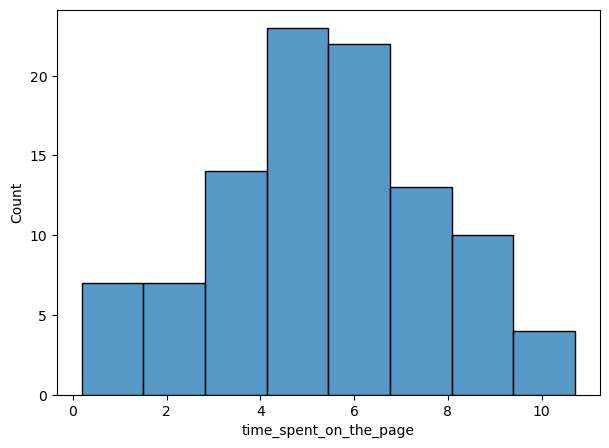

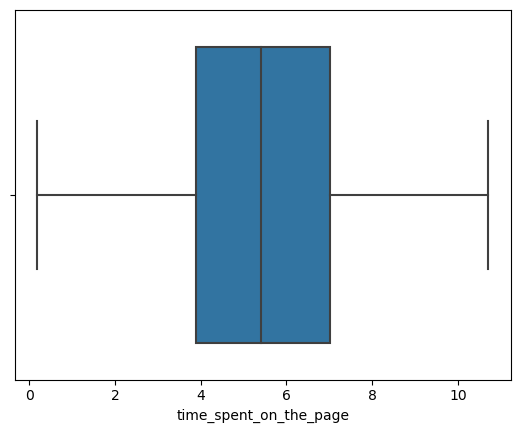

In [ ]:
#3 Time spent on the page
plt.figure(figsize=(7,5))
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

The most time being spent by the user on the landing pages are 23 minutes (approx.) while the average time spent is approximately 5.7 minutes.

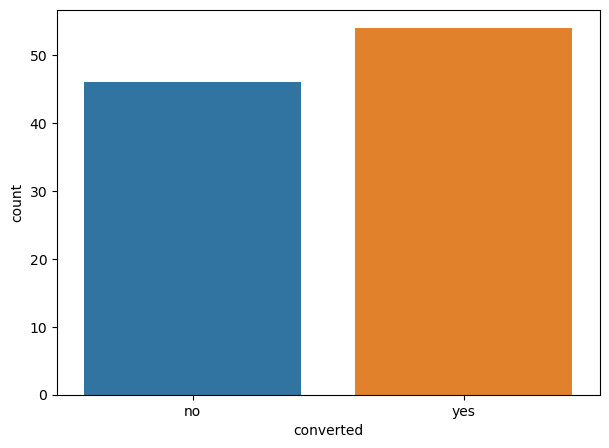

In [ ]:
#4 Converted
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='converted')
plt.show()

It can be oberved from the graph that the number of user that get to converted to a susbcriber of the news portal are approx. 56 in number

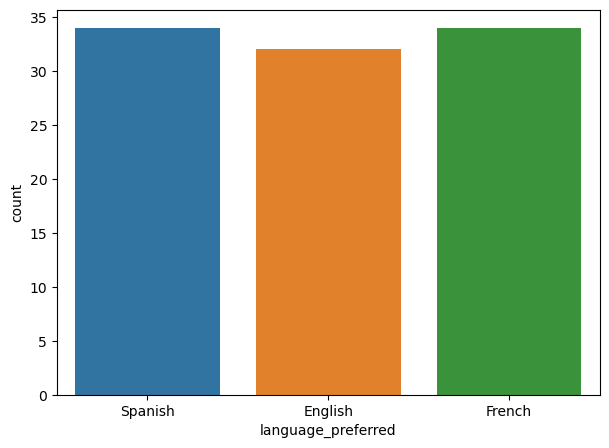

In [ ]:
#5 Languages Preferred
plt.figure(figsize=(7,5))
sns.countplot(data=df,x='language_preferred')
plt.show()

The languages preferred most by the users to view the landing pages are Spanish and French (each being 34 in number)

### Bivariate Analysis

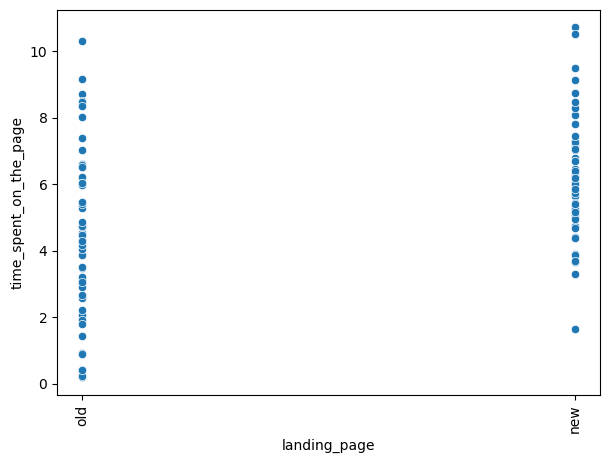

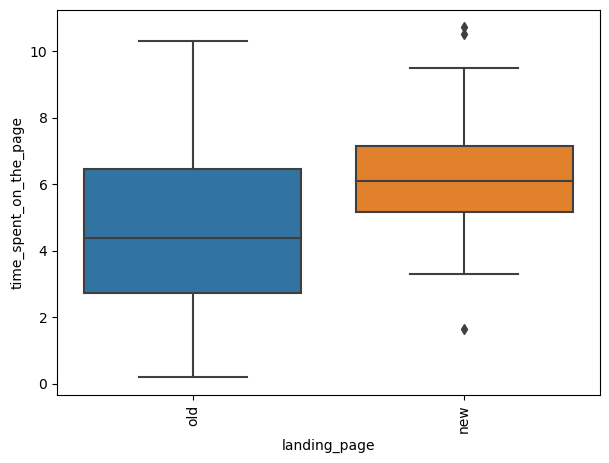

In [ ]:
#1 Landing Page v/s Time Spent on the Page
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.xticks(rotation = 90)
plt.show()

1. It can be observed from the graphs plotted above that the average time spent by users reading old landing pages are approx.4.4 minutes and reading new landing new pages are 6 minutes.
2. It can also be observed that there are outliers in the boxplot between new landing pages and time spent by users reading new landing pages.This indicates that some users take over 10 minutes to read than the average 6 minutes and a few users take less than 2 minutes on the landing pages.

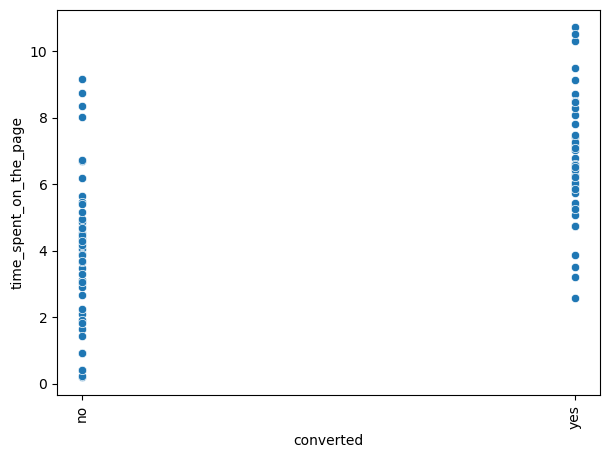

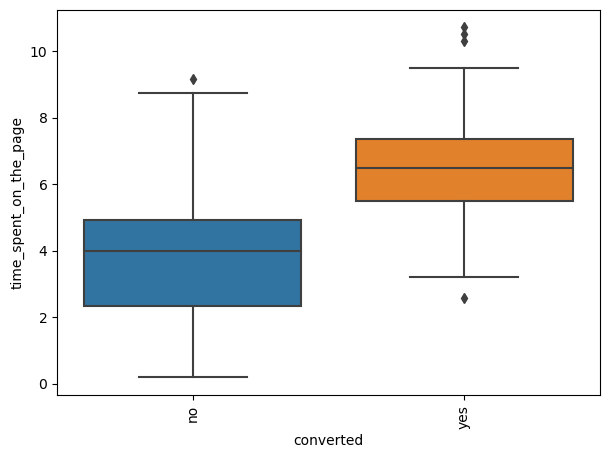

In [ ]:
#2 Conversion v/s Time spent on the page
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='converted',y='time_spent_on_the_page')
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.xticks(rotation = 90)
plt.show()

1. It can be observed from the graphs that the users that did not get converted to a subscriber of the news portal spends about 4 minutes (on an average) on the landing pages
2. The users that got converted spend about 6.5 minutes on the landing pages on an average.
3. The boxplot between the users that did not get converted and time spent on the page by them is skewed to the right.
4. There are outliers present in both the boxplots.

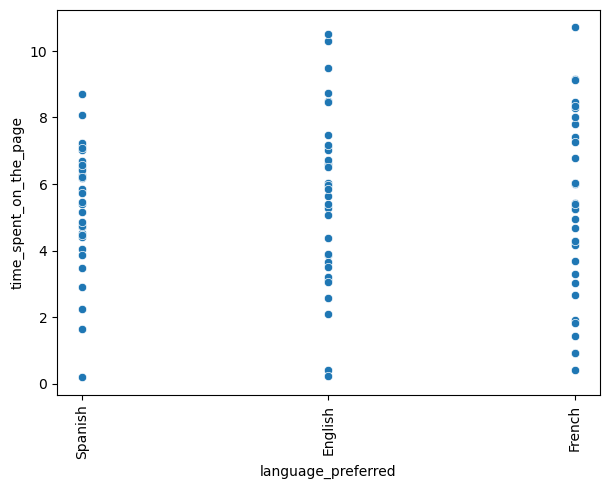

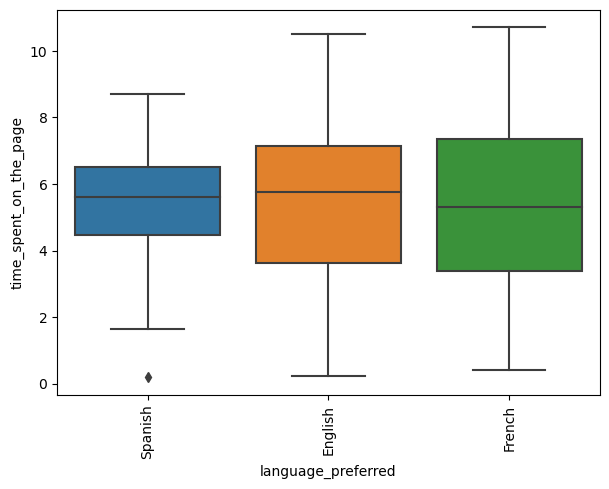

In [ ]:
#3 Language Prefrred v/s Time spent on the page
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.xticks(rotation = 90)
plt.show()

1. All the three boxplots are moderately skewed with the average amount of time being spent by users speaking Spanish, English and French are about 5.7 minutes.
2. The maximum amount of time, about 11 minutes by users preferring French to view the landing pages.
3. The minimum amount of time about just 1 minute by users preferring English to view the landing pages.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

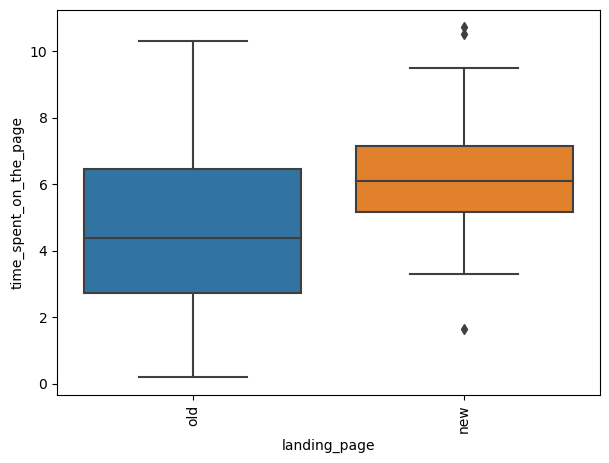

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.xticks(rotation = 90)
plt.show()

### Step 1: Define the null and alternate hypotheses

Let μ be the amount of time users spend on landing pages
Let μ1 be the amount of time users spend on new landing pages and μ2 be the amount of time users spend on existing landing pages

Therefore,
Null Hypothesis, N0: μ1 = μ2
Alternate Hypothesis, Na: μ1 > μ2

### Step 2: Select Appropriate test

Since the given scenario is one-tail test comparing two population means from two independent populations, while the standard deviations are unkown. Therefore, Two Independent Sample t-test can be selected to determine wether the users prefer to spend more time on new landing pages rather than the existing ones.

### Step 3: Decide the significance level

The significance level can be assumed to be 5% (0.05)

### Step 4: Collect and prepare data

In [ ]:
time_spent_on_new_landing_page = df[df['landing_page']=='new']['time_spent_on_the_page']
print('The mean time time spent by users on the new landing pages is '+ str(round(time_spent_on_new_landing_page.mean())))
print('The amount of time spent by the users on the new landing pages is '+ str(round(time_spent_on_new_landing_page.std(),2)))

time_spent_on_old_landing_page = df[df['landing_page']=='old']['time_spent_on_the_page']
print('The mean time time spent by users on the old landing pages is '+ str(round(time_spent_on_old_landing_page.mean())))
print('The amount of time spent by the users on the old landing pages is '+ str(round(time_spent_on_old_landing_page.std(),2)))

The mean time time spent by users on the new landing pages is 6
The amount of time spent by the users on the new landing pages is 1.82
The mean time time spent by users on the old landing pages is 5
The amount of time spent by the users on the old landing pages is 2.58


### Step 5: Calculate the p-value

In [ ]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(time_spent_on_new_landing_page, time_spent_on_old_landing_page, equal_var = False, alternative = 'greater')
print('The p-value calculated is ', p_value)

The p-value calculated is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print('As the p-value calculated is less than the significance level, we reject the null hypothesis.')
else:
    print('As the p-value calculated is greater than the significance level, we fail to reject the null hypothesis.')

As the p-value calculated is less than the significance level, we reject the null hypothesis.


### Step 7:  Draw inference

The p_value calculated for the given scenario is 0.0001392 which is less than the level of significance level, hence, Null Hypothesis can be rejected. Therefore, we can conclude that there is enough evidence to determine wether the users spend more time on the landing page rather than the existing ones.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

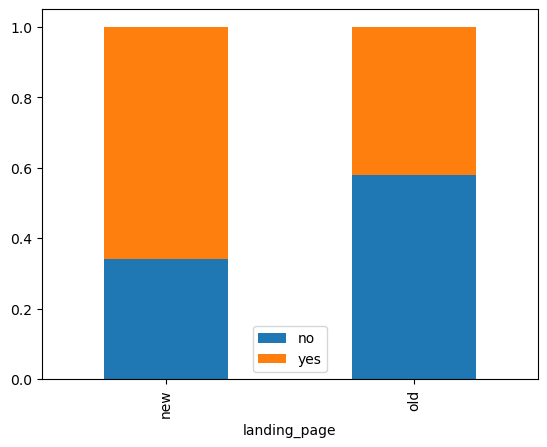

In [ ]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", stacked=True)
plt.legend()
plt.show()

Let μ be the proportion of users that visit the landing page and get converted.

Let μ1 be the conversion rate for the new page and μ2 be conversion rate for the old page.

Therefore,
Null Hypothesis, N0: μ1 = μ2

Alternate Hypothesis, Na: μ1 > μ2

The significance level can be assumed to be 5% (0.05)

The given scenario is a one-tail test requiring to compare two population proportions from two independent populations.

Two Sample z-test would be the apropriate test to use for determining wether old or new page has greater conversion rates.

In [ ]:
control_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
print('The number of users that got converted to the control group are ',control_converted)

control_group = df.group.value_counts()['control']
print('The total number of users that belong to the control group are ',control_group)

treatment_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
print('The number of users that got converted to the control group are ',control_converted)

treatment_group = df.group.value_counts()['treatment']
print('The total number of users that belong to the treatment group are ',treatment_group)

The number of users that got converted to the control group are  21
The total number of users that belong to the control group are  50
The number of users that got converted to the control group are  21
The total number of users that belong to the treatment group are  50


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([control_converted,treatment_converted],[control_group,treatment_group])
print('The p-value calculated is ' + str(p_value))

The p-value calculated is 0.016052616408112556


In [ ]:
if p_value < 0.05:
    print('As the p-value calculated is less than the significance level, Null hypothesis can be rejected.')
else:
    print('As the p-value calculated is greater than the significance level, Null hypothesis is failed to be rejected.')

As the p-value calculated is less than the significance level, Null hypothesis can be rejected.


The p_value calculated for the given scenario is 0.01605 which is less than the level of significance level, hence, Null Hypothesis can be rejected. Therefore it is indicated that there is strong evidence to support the claim that the conversion rate is higher for new pages rather than the old ones.

## 3. Is the conversion and preferred language are independent or related?

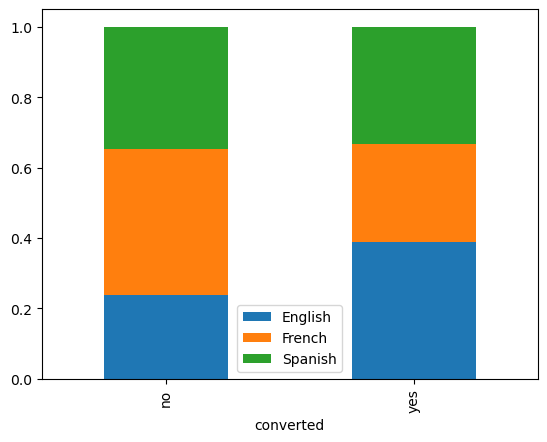

In [ ]:
pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", stacked=True)
plt.legend()
plt.show()

Null Hypothese, N0 = Conversion Rate is independent of the languages preferred.

Alternate Hypotheses, Ha = Conversion Rate and the languages preferred are related to one another.

Since the scenario requires us to compare categorical variables from a population are independent, Chi-Square Test for Independence would be the apropriate test to be selected.

The significance level can be assumed to be 5% (0.05)

In [ ]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [ ]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value calculated is', p_value)

The p-value calculated is 0.21298887487543447


In [ ]:
if p_value < 0.05:
    print('As the p-value calculated is less than the significance level, Null hypothesis can be rejected.')
else:
    print('As the p-value calculated is greater than the significance level, Null hypothesis is failed to be rejected.')

As the p-value calculated is greater than the significance level, Null hypothesis is failed to be rejected.


The p_value obtained from the the above calculations is 0.212 which is more than the assumed level of significance, hence Null Hypothesis is failed to be rejected. Therefore, it indicates that the there isnt enough satistical evidence to conclude wether conversion rate and the language preferred by the users are independent or not.

## 4. Is the time spent on the new page same for the different language users?

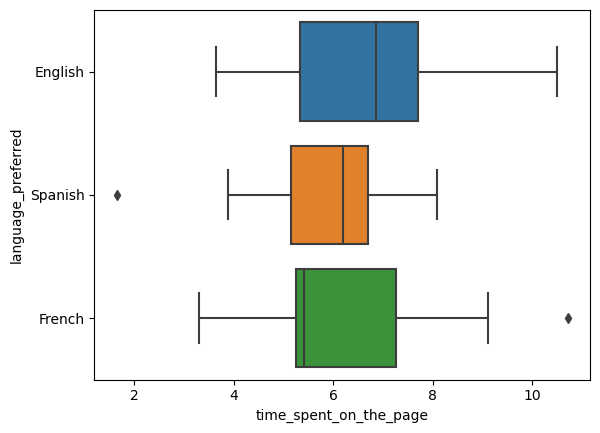

In [ ]:
avodata = df[df['landing_page'] =='new']

sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', data = avodata)
plt.show()

ANOVA Test

The significance level can be assumed to be 5% (0.05)

Null Hypotheses, H0 = Time spent on new page is same across all language users.

Alternate Hypothese, Ha = Time spent on new page is different for at least one language

In [ ]:
print(avodata.groupby(['language_preferred'])['time_spent_on_the_page'].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


In [ ]:
language_English = avodata[avodata['language_preferred']=="English"]['time_spent_on_the_page']
language_Spanish = avodata[avodata['language_preferred']=='Spanish']['time_spent_on_the_page']
language_French = avodata[avodata['language_preferred']=='French']['time_spent_on_the_page']

In [ ]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(language_English,language_Spanish,language_French)
print('The p-value calculated is ' + str(p_value))

The p-value calculated is 0.43204138694325955


In [ ]:
if p_value < 0.05:
    print('As the p-value calculated is less than the significance level, Null hypothesis can be rejected.')
else:
    print('As the p-value calculated is greater than the significance level, Null hypothesis is failed to be rejected.')

As the p-value calculated is greater than the significance level, Null hypothesis is failed to be rejected.


The p_value obtained from the the above calculations is 0.432 which is more than the assumed level of significance, hence Null Hypothesis is failed to be rejected. Therefore, it indicates that the there isnt enough satistical evidence to determine if the time spent by each language user spends on a new page id different from one another.

## Conclusion and Business Recommendations

Conclusions:
1. Out of the 100 users that were randomly selected, exactly half of them were divided equally into both the groups, i.e 50 users belonged to the first group (control) and 50 users belonged to the second group (treatment).
2. Similarly, exactly half, out of 100, of the landing pages are new and the other half are old.
3. Users generally prefer Spanish, English and French to view the landing pages, with most users chosing Spanish and French (34 respectively in number).
4. Most of the users (54 exactly in number) get converted as a subscriber of the news portal.
5. Users spend about 5.4 minutes (on an average) to view landing pages with the maximum amount of time being spent by the user is 10.71 minutes in some cases.

Business Recommendations:
1. More languages can be introduced so that the ENews Express Portal can be expanded to a much wider range of audience, hence garnering more subscribers.
2. More innovative modes of engagements can be introduced so that users can spend more time in the portal while consuming content and getting updated.
3. Captivating graphics (audio,video,etc.) can be launched so that the users can comprehened complex news stories easily.
4. Users can read one news article at the portal for free and then billed at low cost once they decide to subscribe to the news portal.
5. The news portal can be swiftly updated from time to time as and when new stories are being updated.

___